In [25]:
import os
import csv
import matplotlib.pyplot as plt

In [26]:
os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 16")

2304

In [21]:
def findDuration():
    with open("profile", newline="") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        tempsTotal = 0
        i = 0
        for row in reader:
            if (i >= 5):
                tempsTotal += float(row[1])
            i += 1
        return tempsTotal


In [22]:
findDuration()

0

In [9]:
with open("profile", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    i = 0
    tempsTotal = 0 
    for row in reader:
        if (i >= 5):
            tempsTotal += float(row[1])
            print(row[1], "->", row[18])
        i += 1
    print("Temps total", tempsTotal)

Temps total 0


In [18]:
N = [1,2,4,8,16,32,64,128]
durations = []
for n in N:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N " + str(n))
    durations.append(findDuration())
print(durations)

[566.041, 568.2499999999999, 557.591, 610.8729999999999, 576.923, 605.529, 590.5540000000001, 579.321]


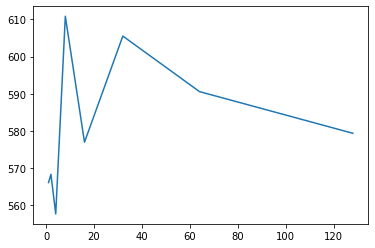

In [19]:
plt.plot(N,durations)
plt.show()